In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1.Introduction**

This project represents the aggregation of various laboratory sub-problems within the Data Mining course as well as code snippets from online public sources. The idea around the project is to generate a simple/naive chat assistant for answering philosophical questions based on training data which is chosen at start and theoretically represents the book/text which is best suitable with one's philosophical beliefs. 

##**2.Problem statement**


Sometimes, people may have inherent complex perspectives about life, social constructs and even objective reality. Or, rather, their own thought process aligns with certain philosophy schools, but they are not entirely relying on fixed ideas. 

Also, some people don't have the opportunity to freely express their own beliefs due to various reasons: opression, inhibition, shyness or simply not thinking about practicing philosophical expression.

We may assume that everyone's beliefs move around the following 6 major philosophy schools or religions for which we provide an **utterly** brief description:

1. Nihilism, Existentialism, Absurdism: *No moral values, 
principles, truths. God is dead.* 
2. Hedonism, Utilitarianism - *Pleasure is the key to a good life. Moralty is solely based on outcomes.*
3. Marxism: *Religion is the opium of masses* (materialism, dictatorship, communism).
4. Rationalism: *Knowledge comes from reason and thought, rather than empirical evidence.*
5. Stoicism, Budhism and Taoism: meditation, karma, individual, simplicity, naturalness, courage, and moderation.
6. Christianity, Deonotology: The laws of Moses. Divine command. Moralty decided by the nature of the action.

The scope of this project is to analyse the correlation between the 6 philosophies described above with the help of Data Mining tools. Also, the final aim is to be able to generate new text which is representative for one's belief, having as a base a personal text and 6 book chosen to represent the 6 ideas and trying to locate the personal text in those ideas. 



*   use CBOW because we have a relative big data (even though it may be overfitted), and Skip-gram is slower. 



###**Imports**

In [2]:
import requests
import string
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import spacy
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import FreqDist 
from nltk.stem import WordNetLemmatizer


In [3]:
!python -m spacy download en_core_web_sm
!pip install --upgrade openai
nltk.download('wordnet')


2023-05-23 21:15:17.676604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.1 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##**3.Dataset description**

The dataset is composed by 6 books which are representative for the 6 philosophies described above:


1. *On the Heights of Despair* (Emil Cioran)
2. *A Hedonist Manifesto - The power to exist* (Michel Onfray)
3. *A Communist Manifesto* (Karl Marx, Friedrich Engels)
4. *Letters from a stoic* (Lucius Seneca)
5. *Mere Christianity* (C.S. Lewis)
6. *Rationality and the reflective mind* (Christopher Hitchens)

In [4]:
allowed_chars = string.ascii_letters + string.digits + string.whitespace

# Nihilism, Existentialism, Absurdism
f1 = open("/content/drive/MyDrive/DM_project/Cioran_E_M_-_On_the_Heights_of_Despair.txt", "r", encoding = "ISO-8859-1")
nihil_book = f1.read()

# Hedonism, Utilitarianism 
f2 = open("/content/drive/MyDrive/DM_project/A_Hedonist_Manifesto_The_Power_to_Exist.txt", "r", encoding = "ISO-8859-1")
hedonism_book = f2.read()

# Marxism: A Communist Manifesto
f3 = open("/content/drive/MyDrive/DM_project/A_Communist_Manifesto.txt", "r", encoding = "ISO-8859-1")
marx_book = f3.read()

# Stoicism, Budhism and Taoism: Letters from a stoic (Seneca)
f4 = open("/content/drive/MyDrive/DM_project/letters-from-a-stoic_lucius-annaeus-seneca.txt", "r", encoding = "ISO-8859-1")
stoic_book = f4.read()

# Christianity, Deonotology: C.S. Lewis: Mere Christianity
f5 = open("/content/drive/MyDrive/DM_project/merechristianitylewis.txt", "r", encoding = "ISO-8859-1")
christian_book = f5.read()

# Rationalist: 

# f6 = open("/content/drive/MyDrive/DM_project/christopher-hitchens-god-is-not-great.txt", "r", encoding = "ISO-8859-1")
f6 = open("/content/drive/MyDrive/DM_project/rationality-and-the-reflective-mind_compress.txt", "r", encoding = "ISO-8859-1")
rational_book = f6.read()

In [5]:
hedonist_title = 'A_Hedonist_Manifesto'
stoic_title = 'Letters_from_a_stoic'
marx_title = 'A_Communist_Manifesto'
nihil_title = 'On_the_Heights_of_Despair'
christian_title = 'Mere_Christianity'
rational_title = 'Rationality_and_the_reflective_mind'

##**4. Data cleaning**

Let's perform the following data cleaning steps:

For the raw text:
*   Redundant spaces and chars (\n, \r, etc...) are removed.
*   Words are lowercased.

For the dataset:
*   All steps mentioned above.
*   Words are **NOT** lemmatized, nor stemmed.
*   English stopwords are removed.
*   Tokenization: the text is splitted into sentences and the sentences into words. 
*   Punctuation is removed.


**Specification**: we keep a copy for the books as processed plain text instead of dataframe for using it further.


In [6]:

import re

def clean_chars_raw(text):

  text = re.sub('\s{2,}', ' ', text) #replace 2 spaces with 1
  text = text.replace('\r', ' ')
  text = text.replace('\n', ' ')
  text = text.replace('\t', ' ')
  text = text.replace('\'', '')
  text = text.replace('- ', '')
  text = text.lower()                      # lowercase it
  return text

nihil_raw = clean_chars_raw(nihil_book)
hedonism_raw = clean_chars_raw(hedonism_book)
marx_raw =  clean_chars_raw(marx_book)
stoic_raw =  clean_chars_raw(stoic_book)
christian_raw =  clean_chars_raw(christian_book)
rational_raw =  clean_chars_raw(rational_book)

In [7]:
nlp = spacy.load("en_core_web_sm")
import re
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.parsing.preprocessing import remove_stopwords


def clean_chars(text):

  text = re.sub('\s{2,}', ' ', text) #replace 2 spaces with 1
  text = text.replace('\r', ' ')
  text = text.replace('\n', ' ')
  text = text.replace('\t', ' ')
  text = ''.join(c for c in text if c in allowed_chars) # only keep numbers, letters, spaces

  doc = text.split()
  empty_list = []
  for word in doc:
    word = str(word)
    word = word.lower()                             # lowercase it
    #empty_list.append(lemmatizer.lemmatize(word))   # lemmatize
    empty_list.append(word)   # lemmatize

  text = ' '.join(map(str,empty_list))
  text = remove_stopwords(text)

  return text

nihil_book = clean_chars(nihil_book)
hedonism_book = clean_chars(hedonism_book)
marx_book = clean_chars(marx_book)
stoic_book = clean_chars(stoic_book)
christian_book = clean_chars(christian_book)
rational_book = clean_chars(rational_book)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
nihil_book

'lyrical stay closed inside chase expression form trying deliver pre cious contents meanings desperately attempting orga nize rebellious chaotic process wouldnt creative simply surrender inner fluidity intention objectifying intimately voluptuously soaking inner turmoil struggle feel richer intensity inner growth spir itual experience kinds insights blend flourish fertile effervescence sensation actuality spiritual tent born like rise wave musical phrase ones self sense pride enrichment tormented sense inner infinity means live tensely feel die life feeling rare strange live shouts feel die life ask makes sense look explanation entire spiritual past vibrates inside supreme tension sense total presence res urrects buried experiences lose normal rhythm heights life caught death fear normally accompanies feeling similar experienced lovers heights happiness passing intense intimation death premonition betrayal haunts budding love endure experiences end danger repressing requires objectific

In [9]:

def to_df(text):
  text_lines = text.splitlines()
  text_df = pd.DataFrame({
    "line": text_lines,
    "line_number": list(range(len(text_lines)))
  })
  return text_df

nihil_df = to_df(nihil_book)
hedonism_df = to_df(hedonism_book)
marx_df = to_df(marx_book)
stoic_df = to_df(stoic_book)
christian_df = to_df(christian_book)
rational_df = to_df(rational_book)
# We’ll want to know which content comes from which book
nihil_df = nihil_df.assign(book = nihil_title)
hedonism_df = hedonism_df.assign(book = hedonist_title)
marx_df = marx_df.assign(book = marx_title)
stoic_df = stoic_df.assign(book = stoic_title)
christian_df = christian_df.assign(book = christian_title)
rational_df = rational_df.assign(book = rational_title)

# Finally, we concatenate the books into one dataframe
books = [nihil_df, hedonism_df, marx_df, stoic_df, christian_df, rational_df]
text_books_df = pd.concat(books)
text_books_df.head()

,line,line_number,book
0,lyrical stay closed inside chase expression fo...,0,On_the_Heights_of_Despair
0,philosophical path dominant historiography cla...,0,A_Hedonist_Manifesto
0,manifesto communist party spectre haunting eur...,0,A_Communist_Manifesto
0,stoicism centuries influential philosophy grae...,0,Letters_from_a_stoic
0,inclined think mistakean undesirable hybrid ar...,0,Mere_Christianity


In [10]:
text_books_df

,line,line_number,book
0,lyrical stay closed inside chase expression fo...,0,On_the_Heights_of_Despair
0,philosophical path dominant historiography cla...,0,A_Hedonist_Manifesto
0,manifesto communist party spectre haunting eur...,0,A_Communist_Manifesto
0,stoicism centuries influential philosophy grae...,0,Letters_from_a_stoic
0,inclined think mistakean undesirable hybrid ar...,0,Mere_Christianity
0,term rationality strong weak sense strong sens...,0,Rationality_and_the_reflective_mind


In [11]:
# We split the data into words. We first split the text column into a list of words
text_books_df['word'] = text_books_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
text_books_df = text_books_df.explode('word')

# Reset the index of the dataframe (we want to index each word now)
text_books_df = text_books_df.reset_index(drop=True)
text_books_df.drop(columns = 'line_number', inplace=True)
text_books_df.head()

,line,book,word
0,lyrical stay closed inside chase expression fo...,On_the_Heights_of_Despair,lyrical
1,lyrical stay closed inside chase expression fo...,On_the_Heights_of_Despair,stay
2,lyrical stay closed inside chase expression fo...,On_the_Heights_of_Despair,closed
3,lyrical stay closed inside chase expression fo...,On_the_Heights_of_Despair,inside
4,lyrical stay closed inside chase expression fo...,On_the_Heights_of_Despair,chase


In [12]:
text_books_df['word'] = text_books_df['word'].apply(lambda x: x.lower())
text_books_df = text_books_df[~text_books_df['word'].isin(stopwords.words('english'))] 

##**5. Analyzing word and document frequency**

By intuition, the most frequent words (except stop words) are prone to represent an idea. 

Let's analyse each book by its **TF-IDF** index and look up to the highest values.

In [13]:
count_df_1 = text_books_df.groupby(['word', 'book']).size().sort_values(ascending=False).reset_index(name='count') 
count_df_2 = text_books_df.groupby(['book']).size().sort_values(ascending=False).reset_index(name='count') 
book_words = count_df_1.merge(count_df_2, on='book')
book_words = book_words.rename(columns={'count_x': 'word_appearances_in_book', 'count_y': 'book_total_word_count'}) 
book_words['tf'] = book_words['word_appearances_in_book']/book_words['book_total_word_count']
book_words['rank'] = book_words.groupby('book')['word_appearances_in_book'].rank(method='dense', ascending=False)

In [14]:
N = n = []

N = book_words['book'].nunique()
n = book_words.groupby('word')['book'].transform(lambda x: len(x.unique()))
book_words['idf'] = np.log(N/n)
book_words['tf-idf'] = book_words['tf'] * book_words['idf'] 

book_words

,word,book,word_appearances_in_book,book_total_word_count,tf,rank,idf,tf-idf
0,j,Rationality_and_the_reflective_mind,611,68354,0.008939,1.0,0.405465,0.003624
1,cognitive,Rationality_and_the_reflective_mind,586,68354,0.008573,2.0,1.791759,0.015361
2,intelligence,Rationality_and_the_reflective_mind,525,68354,0.007681,3.0,0.182322,0.001400
3,thinking,Rationality_and_the_reflective_mind,478,68354,0.006993,4.0,0.000000,0.000000
4,r,Rationality_and_the_reflective_mind,472,68354,0.006905,5.0,0.693147,0.004786
...,...,...,...,...,...,...,...,...
40861,daysthose,A_Hedonist_Manifesto,1,23739,0.000042,60.0,1.791759,0.000075
40862,noting,A_Hedonist_Manifesto,1,23739,0.000042,60.0,1.098612,0.000046
40863,nourish,A_Hedonist_Manifesto,1,23739,0.000042,60.0,1.791759,0.000075
40864,nouvelle,A_Hedonist_Manifesto,1,23739,0.000042,60.0,1.791759,0.000075


In [15]:
# we drop columns not relevant anymore
book_words = book_words.drop(columns=['word_appearances_in_book', 'book_total_word_count', 'tf', 'rank', 'idf'])
book_words.sort_values('tf-idf', ascending=False).head(20)

,word,book,tf-idf
1,cognitive,Rationality_and_the_reflective_mind,0.015361
28042,bourgeois,A_Communist_Manifesto,0.011166
28043,bourgeoisie,A_Communist_Manifesto,0.010019
28045,proletariat,A_Communist_Manifesto,0.009101
28060,communists,A_Communist_Manifesto,0.006611
28066,proletarian,A_Communist_Manifesto,0.006237
18,stanovich,Rationality_and_the_reflective_mind,0.006212
28068,engels,A_Communist_Manifesto,0.005987
28046,production,A_Communist_Manifesto,0.005308
28051,communist,A_Communist_Manifesto,0.005277


In [16]:
# we group the dataframe by each book. We also use this df when checking for sentiment analysis.
temp_nihil = book_words[book_words['book'] == nihil_title].sort_values('tf-idf', ascending=False).head(20)
temp_hedonism = book_words[book_words['book'] == hedonist_title].sort_values('tf-idf', ascending=False).head(20)
temp_stoic = book_words[book_words['book'] == stoic_title].sort_values('tf-idf', ascending=False).head(20)
temp_marx = book_words[book_words['book'] == marx_title].sort_values('tf-idf', ascending=False).head(20)
temp_christian = book_words[book_words['book'] == christian_title].sort_values('tf-idf', ascending=False).head(20)
temp_rational = book_words[book_words['book'] == rational_title].sort_values('tf-idf', ascending=False).head(20)

temp_rational

,word,book,tf-idf
1,cognitive,Rationality_and_the_reflective_mind,0.015361
18,stanovich,Rationality_and_the_reflective_mind,0.006212
25,2003,Rationality_and_the_reflective_mind,0.005190
8,processing,Rationality_and_the_reflective_mind,0.005047
29,tasks,Rationality_and_the_reflective_mind,0.004980
4,r,Rationality_and_the_reflective_mind,0.004786
33,2002,Rationality_and_the_reflective_mind,0.004745
40,2000,Rationality_and_the_reflective_mind,0.004325
41,biases,Rationality_and_the_reflective_mind,0.004273
44,cognition,Rationality_and_the_reflective_mind,0.004220


In [17]:
nihil_50 = pd.DataFrame([word for word in temp_nihil['word'][:5]])
nihil_50.columns = ['Nihilism']
hedonism_50 = pd.DataFrame([ word for word in temp_hedonism['word'][:5]])
hedonism_50.columns = ['Hedonism']
rational_50 = pd.DataFrame([ word for word in temp_rational['word'][:5]])
rational_50.columns = ['Rationalism']
stoic_50 = pd.DataFrame([ word for word in temp_stoic['word'][:5]])
stoic_50.columns = ['Stocism']
christian_50 = pd.DataFrame([ word for word in temp_christian['word'][:5]])
christian_50.columns = ['Christian']
marx_50 = pd.DataFrame([ word for word in temp_marx['word'][:5]])
marx_50.columns = ['Marx']

top_tf_idf = pd.concat([nihil_50, hedonism_50, rational_50, stoic_50, christian_50, marx_50], axis = 1)


In [18]:
top_tf_idf

,Nihilism,Hedonism,Rationalism,Stocism,Christian,Marx
0,nothingness,ethics,cognitive,bc,christ,bourgeois
1,infinity,historiography,stanovich,seneca,god,bourgeoisie
2,agony,platonic,2003,lucilius,christian,proletariat
3,despair,aesthetic,processing,senecas,christians,communists
4,lifes,existential,tasks,posidonius,ought,proletarian


We can also make use of the **TF_IDF** index to check for the similarity between books. Here, we chose to measure the **cosine** distance between the IF-IDF feature vectors among documents.

It is a good metric because it is efficient for comparing different sizes of documents, compared to Euclidean distance which is affected by the difference in length of the feature vectors and Jaccard similarity who transforms the text in a set, where TF-IDF is totally ignored.

In [19]:
# cos-similarity for the 6 books
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer()
vectorizer = TfidfVectorizer()

columns = ['Nihilist', 'Stoic', 'Marxist', 'Christian', 'Hedonist', 'Rational']
corpus = [nihil_book, stoic_book, marx_book, christian_book, hedonism_book, rational_book ]

X = count_vect.fit_transform(corpus)

pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names_out(),index=columns)

trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=columns)


from sklearn.metrics.pairwise import cosine_similarity

arr = cosine_similarity(trsfm[0:len(columns)], trsfm)


<Axes: >

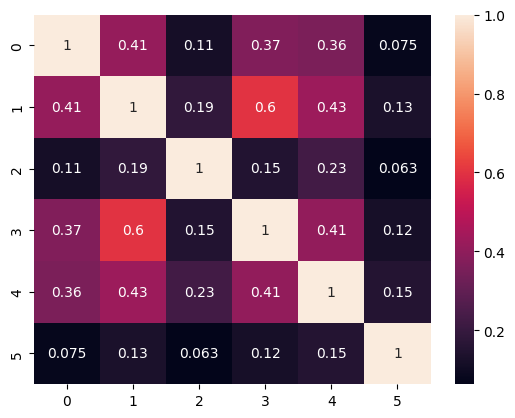

In [20]:
import seaborn as sns
sns.heatmap(arr, annot=True)

In [21]:
arr2 = arr.tolist()
arr2.insert(0, columns)

# the matrix of cosine similarities
from tabulate import tabulate
print(tabulate(arr2, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤══════════╤═══════════╤═════════════╤════════════╤════════════╕
│   Nihilist │    Stoic │   Marxist │   Christian │   Hedonist │   Rational │
╞════════════╪══════════╪═══════════╪═════════════╪════════════╪════════════╡
│  1         │ 0.410746 │ 0.114718  │    0.367986 │   0.357445 │  0.0746013 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│  0.410746  │ 1        │ 0.185733  │    0.59902  │   0.425593 │  0.129637  │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│  0.114718  │ 0.185733 │ 1         │    0.148614 │   0.227092 │  0.0628726 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│  0.367986  │ 0.59902  │ 0.148614  │    1        │   0.405525 │  0.119341  │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│  0.357445  │ 0.425593 │ 0.227092  │    0.405525 │   1        │  0.151075  │
├────────────┼──────────┼───────────┼─────────────┼────────────┼

<ipython-input-22-5c4169dac84a>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_cmap = plt.cm.get_cmap("cool")
<ipython-input-22-5c4169dac84a>:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=edge_cmap))


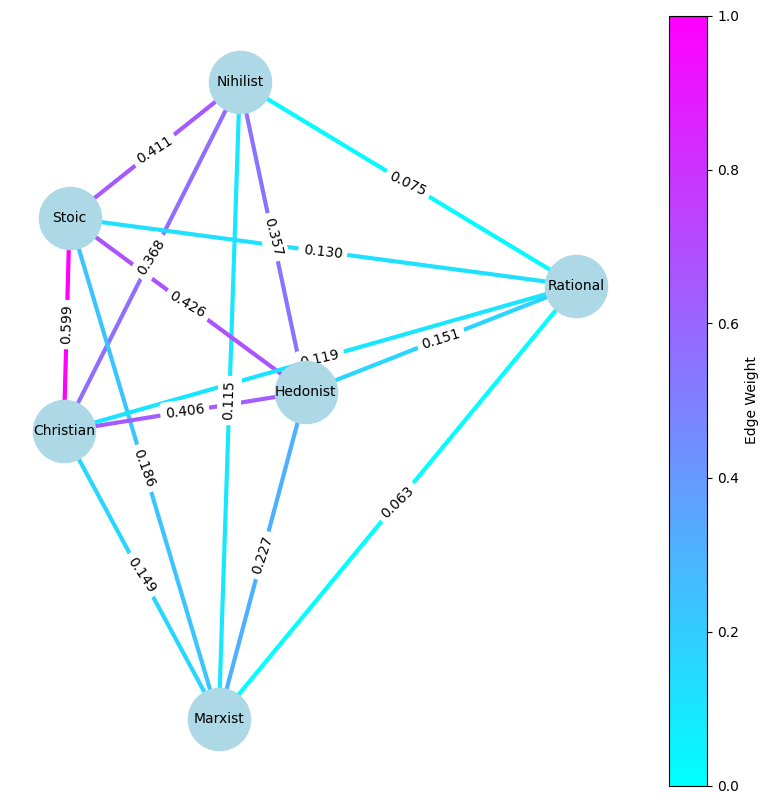

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

matrix = arr

labels = { i: columns[i] for i in range(0, len(columns))}

G = nx.Graph()

# Add nodes to the graph with labels
for node, label in labels.items():
    G.add_node(node, label=label)

# Add edges to the graph from the matrix
num_nodes = len(matrix)
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = matrix[i][j]
        G.add_edge(i, j, weight=weight)

# Extract the edge weights
edge_weights = nx.get_edge_attributes(G, "weight").values()

# Define a colormap for the edge colors
edge_cmap = plt.cm.get_cmap("cool")  

plt.figure(figsize=(10,10))

# Calculate the normalized edge weights for coloring
min_weight = min(edge_weights)
max_weight = max(edge_weights)
norm_edge_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]

# Draw the graph
pos = nx.fruchterman_reingold_layout(G, weight='weight', seed= 1)  # Positions of nodes
edge_labels = nx.get_edge_attributes(G, "weight")  # Edge labels for weights

for x in edge_labels:
  edge_labels[x] = f'{edge_labels[x]:.3f}'

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color=edge_weights, edge_cmap=edge_cmap, width=3)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=edge_cmap))
cbar.set_label("Edge Weight")

plt.axis("off")
plt.savefig("Graph.pdf", dpi=2000)
plt.show()


In [23]:
# Euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

count_vect = CountVectorizer()
vectorizer = TfidfVectorizer()

X2 = count_vect.fit_transform(corpus)
pd.DataFrame(X2.toarray(), columns=count_vect.get_feature_names_out(), index=columns)

trsfm = vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(), columns=vectorizer.get_feature_names_out(), index=columns)

arr = euclidean_distances(trsfm[0:len(columns)], trsfm)
similarity_df = pd.DataFrame(arr, columns=columns, index=columns)
# print(similarity_df)
arr3 = arr.tolist()
arr3.insert(0, columns)

# pretty print the matrix of cosine similarities
from tabulate import tabulate
print(tabulate(arr3, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤══════════╤═══════════╤═════════════╤════════════╤════════════╕
│   Nihilist │    Stoic │   Marxist │   Christian │   Hedonist │   Rational │
╞════════════╪══════════╪═══════════╪═════════════╪════════════╪════════════╡
│    0       │ 1.08559  │   1.33063 │    1.12429  │    1.13363 │    1.36044 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│    1.08559 │ 0        │   1.27614 │    0.895522 │    1.07183 │    1.31937 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│    1.33063 │ 1.27614  │   0       │    1.3049   │    1.24331 │    1.36903 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│    1.12429 │ 0.895522 │   1.3049  │    0        │    1.09039 │    1.32715 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼────────────┤
│    1.13363 │ 1.07183  │   1.24331 │    1.09039  │    0       │    1.30302 │
├────────────┼──────────┼───────────┼─────────────┼────────────┼


We can also visualize the euclidean similarities as a correlation matrix. The brighter the color, the more *distant* the documents.



<Axes: >

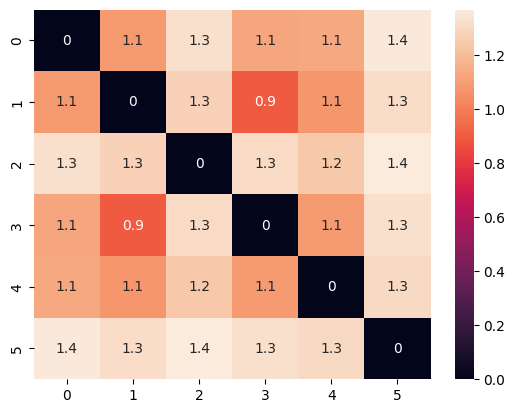

In [24]:
import seaborn as sns
sns.heatmap(arr, annot=True)

##**6. Relationship between words (N-grams)**


We can understand more a document by finding those words that frequently go together. 


In [25]:
#create NGRAMS from the corpus. Example for nihilism book
from nltk.util import ngrams

NGRAMS = ngrams(nihil_book.split(' '), 2)
the_ngrams = ()
for grams in NGRAMS:
    print(grams)
    the_ngrams = (*the_ngrams, grams)
total_bigrams = len(the_ngrams)
# calculate the frequency distribution of the bigrams
ngrams_freqdist1 = nltk.FreqDist(the_ngrams)
ngrams_freqdist1

Streaming output truncated to the last 5000 lines.
('reason', 'decline')
('decline', 'loss')
('loss', 'vivacity')
('vivacity', 'hardening')
('hardening', 'inner')
('inner', 'rhythms')
('rhythms', 'gradual')
('gradual', 'slowing')
('slowing', 'vital')
('vital', 'flow')
('flow', 'process')
('process', 'waste')
('waste', 'destroys')
('destroys', 'receptivity')
('receptivity', 'willingness')
('willingness', 'embrace')
('embrace', 'life')
('life', 'generously')
('generously', 'enthusiastically')
('enthusiastically', 'enthusiast')
('enthusiast', 'preserves')
('preserves', 'energy')
('energy', 'old')
('old', 'age')
('age', 'born')
('born', 'dead')
('dead', 'like')
('like', 'people')
('people', 'die')
('die', 'time')
('time', 'rare')
('rare', 'true')
('true', 'enthusiast')
('enthusiast', 'imagine')
('imagine', 'world')
('world', 'everybody')
('everybody', 'love')
('love', 'world')
('world', 'enthusiasts')
('enthusiasts', 'image')
('image', 'alluring')
('alluring', 'image')
('image', 'paradise'

FreqDist({('life', 'death'): 12, ('fear', 'death'): 12, ('light', 'darkness'): 10, ('death', 'life'): 8, ('commit', 'suicide'): 8, ('form', 'love'): 8, ('heights', 'despair'): 7, ('passion', 'absurd'): 6, ('point', 'view'): 6, ('absolute', 'lyricism'): 6, ...})

We can also generalize the **n-grams** computation for larger values of **n** on our way to text generation.

In [26]:
# calculate the total number of n-grams in the corpus
total_ngrams = len(the_ngrams)
total_ngrams


def generate_ngrams(sentence, n):
    NGRAMS = ngrams(nihil_book.split(' '), n)
    the_ngrams = ()
    for grams in NGRAMS:
      the_ngrams = (*the_ngrams, grams)
    
    ngrams_freqdist = nltk.FreqDist(the_ngrams)
        
    if n>=len(the_ngrams): 
        return None

    possible_words = {}
    for ngram in ngrams_freqdist:
        for i in range(0, len(ngram)-1):
            if ngram[len(ngram)-i-1] == sentence.split()[-i-1]:
                possible_words[ngram[n-1]] = ngrams_freqdist[ngram] / total_ngrams
    if possible_words:
        return max(possible_words, key=possible_words.get)
    else:
        return None
    
    
# predict the next word for a given context
context = "death i weary man if "
next_word = generate_ngrams(context, 5)
print(f"The predicted next word for '{context}' is '{next_word}'")

The predicted next word for 'death i weary man if ' is 'lyrical'


It can be more helpful if we recursiveky generate a word from another instead of trying to find the next word for a long sequence (case with n-grams with large values of n). This can be a naive yet a brave first step to generating text based on a corpus from the last section (which is LSTM based). 

In [27]:
def generate_next_word(sentence):
    prev_word = sentence.split()[-1]
    possible_words = {}
    for bigram in ngrams_freqdist1:
        if bigram[0] == prev_word:
            possible_words[bigram[1]] = ngrams_freqdist1[bigram] / total_bigrams
    if possible_words:
        return max(possible_words, key=possible_words.get)
    else:
        return None

In [28]:

def generate_rec_bigrams(context2):
  for i in range(10):
    bite = context2.split(' ')[-2] + " " + context2.split(' ')[-1]
    context2 = context2 + " " + (generate_next_word(bite))
  return context2

context2 = "nothingness dilating"
next_word2 = generate_rec_bigrams(context2)
next_word2

'nothingness dilating infinity experiencing actions possible sensation actuality spiritual life death life'

Next, we create a dataframe out of all **2-grams** from each document.

In [29]:
import nltk
nltk.download('punkt')

# create a dataframe out of the bigrams for each book
def to_bigrams_df(book, title):

  book_bigrams = list(nltk.bigrams(nltk.word_tokenize(book)))
  bi_df = pd.DataFrame(book_bigrams, columns=['Word 1', 'Word 2'])
  bi_df = bi_df.assign(book = title)
  return bi_df


hedonism_bi_df = to_bigrams_df(hedonism_book, hedonist_title)
stoic_bi_df = to_bigrams_df(stoic_book, stoic_title)
marx_bi_df = to_bigrams_df(marx_book, marx_title)
nihil_bi_df = to_bigrams_df(nihil_book, nihil_title)
christian_bi_df = to_bigrams_df(christian_book, christian_title)
rational_bi_df = to_bigrams_df(rational_book, rational_title)


# Finally, we concatenate the books into one dataframe
books = [nihil_bi_df, hedonism_bi_df, stoic_bi_df, marx_bi_df,christian_bi_df, rational_bi_df]
phil_bi_df = pd.concat(books)
phil_bi_df.head(-10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Word 1,Word 2,book
0,lyrical,stay,On_the_Heights_of_Despair
1,stay,closed,On_the_Heights_of_Despair
2,closed,inside,On_the_Heights_of_Despair
3,inside,chase,On_the_Heights_of_Despair
4,chase,expression,On_the_Heights_of_Despair
...,...,...,...
69868,withinsubject,design,Rationality_and_the_reflective_mind
69869,design,individual,Rationality_and_the_reflective_mind
69870,individual,differences,Rationality_and_the_reflective_mind
69871,differences,125,Rationality_and_the_reflective_mind


In [30]:
# concatenate the bigrams into one column
phil_bi_df['bigrams'] = phil_bi_df['Word 1'] + ' ' + phil_bi_df['Word 2'] 

count_all_bigrams = phil_bi_df.groupby(['bigrams', 'book']).size().sort_values(ascending=False).reset_index(name='count') 

# print(phil_bi_df['bigrams'].value_counts().head(10))
count_all_bigrams.head(20)

,bigrams,book,count
0,et al,Rationality_and_the_reflective_mind,195
1,rational thought,Rationality_and_the_reflective_mind,160
2,individual differences,Rationality_and_the_reflective_mind,157
3,cognitive ability,Rationality_and_the_reflective_mind,155
4,university press,Rationality_and_the_reflective_mind,145
5,type 2,Rationality_and_the_reflective_mind,129
6,2 processing,Rationality_and_the_reflective_mind,99
7,rational thinking,Rationality_and_the_reflective_mind,97
8,new york,Rationality_and_the_reflective_mind,96
9,heuristics biases,Rationality_and_the_reflective_mind,93


We can see that the most common bigrams are resulting from the Christian, Marxist, Stoic and Rationalist books. These books (and their philosophies, respectively) express strong ideas such as:
*  The Holy Trinity in Christianity
*  The marxist retention regarding the burgeoise society and private property.
* The stoic's pleading for being wise/self-controlling and appreciating the **old age**, *for it is full of pleasure if one knows how to use it* (Seneca, XII: 4-5).
* Rational author's tendency to consider religion *destructive*.



---



Now, we can focus on each book and find its most common bigrams based on their TF-IDF score.

In [31]:
bigrams_nihil = phil_bi_df[phil_bi_df['book']== nihil_title]
bigrams_hedonism = phil_bi_df[phil_bi_df['book']==  hedonist_title]
bigrams_marx = phil_bi_df[phil_bi_df['book']== marx_title]
bigrams_christian =  phil_bi_df[phil_bi_df['book']== christian_title]
bigrams_rational =  phil_bi_df[phil_bi_df['book']== rational_title]

In [32]:
# display the most relevant 5 bigrams of each book based on their tf-idf

count_df = phil_bi_df.groupby(['book']).size().sort_values(ascending=False).reset_index(name='count') 
# How many words each book has

count_dff = phil_bi_df.groupby(['bigrams', 'book']).size().sort_values(ascending=False).reset_index(name='count') 
# How many appearances each word has in each book

book_words = count_dff.merge(count_df, on='book')

book_words = book_words.rename(columns={'count_x': 'word_appearances_in_book', 'count_y': 'book_total_word_count'}) 
# Give more meaningful names
book_words.head(-10)

book_words['tf'] = book_words['word_appearances_in_book']/book_words['book_total_word_count']
book_words
book_words['rank'] = book_words.groupby('book')['word_appearances_in_book'].rank(method='dense', ascending=False)
N = n = []

N = book_words['book'].nunique()
n = book_words.groupby('bigrams')['book'].transform(lambda x: len(x.unique()))

book_words['idf'] = np.log(N/n)
book_words['tf-idf'] = book_words['tf'] * book_words['idf'] 

nihil_bi = book_words[book_words['book'] == nihil_title]
nihil_bi = nihil_bi.sort_values(['tf-idf'], ascending = False).head(200)

hedonist_bi = book_words[book_words['book'] == hedonist_title]
hedonist_bi = hedonist_bi.sort_values(['tf-idf'], ascending = False).head(200)

marx_bi = book_words[book_words['book'] == marx_title]
marx_bi = marx_bi.sort_values(['tf-idf'], ascending = False).head(200)

christian_bi = book_words[book_words['book'] == christian_title]
christian_bi = christian_bi.sort_values(['tf-idf'], ascending = False).head(200)

stoic_bi = book_words[book_words['book'] == stoic_title]
stoic_bi = stoic_bi.sort_values(['tf-idf'], ascending = False).head(200)

rational_bi = book_words[book_words['book'] == rational_title]
rational_bi = rational_bi.sort_values(['tf-idf'], ascending = False).head(200)


stoic_bi.head(10)

,bigrams,book,word_appearances_in_book,book_total_word_count,tf,rank,idf,tf-idf
61752,wise man,Letters_from_a_stoic,33,31723,0.001040,1.0,1.791759,0.001864
61754,century bc,Letters_from_a_stoic,20,31723,0.000630,3.0,1.791759,0.001130
61758,dear lucilius,Letters_from_a_stoic,12,31723,0.000378,6.0,1.791759,0.000678
61759,liberal studies,Letters_from_a_stoic,11,31723,0.000347,7.0,1.791759,0.000621
61753,old age,Letters_from_a_stoic,24,31723,0.000757,2.0,0.693147,0.000524
61755,good man,Letters_from_a_stoic,15,31723,0.000473,4.0,1.098612,0.000519
61764,roman history,Letters_from_a_stoic,9,31723,0.000284,9.0,1.791759,0.000508
61756,sort thing,Letters_from_a_stoic,14,31723,0.000441,5.0,1.098612,0.000485
61767,roman politician,Letters_from_a_stoic,7,31723,0.000221,11.0,1.791759,0.000395
61768,happy life,Letters_from_a_stoic,7,31723,0.000221,11.0,1.791759,0.000395


In [33]:
christian_bi

,bigrams,book,word_appearances_in_book,book_total_word_count,tf,rank,idf,tf-idf
92017,moral law,Mere_Christianity,26,23041,0.001128,1.0,1.791759,0.002022
92023,decent behaviour,Mere_Christianity,15,23041,0.000651,4.0,1.791759,0.001166
92027,certain way,Mere_Christianity,12,23041,0.000521,7.0,1.791759,0.000933
92029,law human,Mere_Christianity,11,23041,0.000477,8.0,1.791759,0.000855
92032,christian idea,Mere_Christianity,10,23041,0.000434,9.0,1.791759,0.000778
...,...,...,...,...,...,...,...,...
92407,knows perfectly,Mere_Christianity,3,23041,0.000130,16.0,1.791759,0.000233
92391,think way,Mere_Christianity,3,23041,0.000130,16.0,1.791759,0.000233
92392,course people,Mere_Christianity,3,23041,0.000130,16.0,1.791759,0.000233
92393,right god,Mere_Christianity,3,23041,0.000130,16.0,1.791759,0.000233


In [34]:
for bigram1 in nihil_bi['bigrams']:
  word11 = bigram1.split(' ')[0]
  word12 = bigram1.split(' ')[1]
  for bigram2 in stoic_bi['bigrams']:
    word21 = bigram2.split(' ')[0]
    word22 = bigram2.split(' ')[1]
    for bigram3 in christian_bi['bigrams']:
        word31 = bigram3.split(' ')[0]
        word32 = bigram3.split(' ')[1]
        if word11==word21 or word11==word22 or word12 == word21 or word12==word22:
            if word31==word21 or word31==word22 or word32 == word21 or word32==word22: 
                print(bigram1, "(Nihilism) -- ", bigram2, "(Stoicism) -- ", bigram3, "(Cristianity)")

death life (Nihilism) --  happy life (Stoicism) --  new life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  life god (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  natural life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  christian life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  biological life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  kind life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  spiritual life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  threepersonal life (Cristianity)
death life (Nihilism) --  happy life (Stoicism) --  religious life (Cristianity)
death life (Nihilism) --  public life (Stoicism) --  new life (Cristianity)
death life (Nihilism) --  public life (Stoicism) --  life god (Cristianity)
death life (Nihilism) --  public life (Stoicism) --  natural life (Cristianity)
death life (Nihilism) --  public life (Stoicism) --  

In [35]:
for bigram1 in rational_bi['bigrams']:
  word11 = bigram1.split(' ')[0]
  word12 = bigram1.split(' ')[1]
  for bigram2 in marx_bi['bigrams']:
    word21 = bigram2.split(' ')[0]
    word22 = bigram2.split(' ')[1]
    for bigram3 in hedonist_bi['bigrams']:
        word31 = bigram3.split(' ')[0]
        word32 = bigram3.split(' ')[1]
        if word11==word21 or word11==word22 or word12 == word21 or word12==word22:
            if word31==word21 or word31==word22 or word32 == word21 or word32==word22: 
                print(bigram1, "(Rational) -- ", bigram2, "(Marxist) -- ", bigram3, "(Hedonist)")

working memory (Rational) --  revolution working (Marxist) --  french revolution (Hedonist)
social psychology (Rational) --  new social (Marxist) --  new kind (Hedonist)
social psychology (Rational) --  new social (Marxist) --  new testament (Hedonist)
social psychology (Rational) --  new social (Marxist) --  social time (Hedonist)
social psychology (Rational) --  new social (Marxist) --  new possibilities (Hedonist)
social psychology (Rational) --  new social (Marxist) --  new atheists (Hedonist)
social psychology (Rational) --  social conditions (Marxist) --  social time (Hedonist)
social psychology (Rational) --  social order (Marxist) --  social time (Hedonist)
social psychology (Rational) --  social order (Marxist) --  order rid (Hedonist)
personality social (Rational) --  new social (Marxist) --  new kind (Hedonist)
personality social (Rational) --  new social (Marxist) --  new testament (Hedonist)
personality social (Rational) --  new social (Marxist) --  social time (Hedonist)


In [36]:
for bigram1 in rational_bi['bigrams']:
  word11 = bigram1.split(' ')[0]
  word12 = bigram1.split(' ')[1]
  for bigram2 in marx_bi['bigrams']:
    word21 = bigram2.split(' ')[0]
    word22 = bigram2.split(' ')[1]
    for bigram3 in stoic_bi['bigrams']:
        word31 = bigram3.split(' ')[0]
        word32 = bigram3.split(' ')[1]
        if word11==word21 or word11==word22 or word12 == word21 or word12==word22:
            if word31==word21 or word31==word22 or word32 == word21 or word32==word22: 
                print(bigram1, "(Rational) -- ", bigram2, "(Marxist) -- ", bigram3, "(Stoic)")

individual differences (Rational) --  individual property (Marxist) --  elses property (Stoic)
working memory (Rational) --  working men (Marxist) --  wise men (Stoic)
working memory (Rational) --  working men (Marxist) --  great men (Stoic)
working memory (Rational) --  working men (Marxist) --  race men (Stoic)
working memory (Rational) --  working men (Marxist) --  things men (Stoic)
working memory (Rational) --  working mens (Marxist) --  mens minds (Stoic)
working memory (Rational) --  benefit working (Marxist) --  utmost benefit (Stoic)
child development (Rational) --  stage development (Marxist) --  comic stage (Stoic)


##**7.Topic analysis**


We can also use Latent Dirichlet Allocation (LDA) for topic modeling in order to learn the topic distributions for each document and the word distributions for each topic.



In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize, sent_tokenize

In [38]:
# Add all our processed documents to a list
documents = [nihil_book, hedonism_book, christian_book, stoic_book, marx_book, rational_book]
nltk.download('punkt')

# Preprocessing function
def preprocess(text):
    # Tokenize words
    words = word_tokenize(text)
    return ' '.join(words)

# Preprocess the documents
preprocessed_documents = [preprocess(doc) for doc in documents]
#preprocessed_documents[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
vectorizer = CountVectorizer(max_df=0.99, min_df=0, stop_words='english')
term_document_matrix = vectorizer.fit_transform(preprocessed_documents)
#print(term_document_matrix[0]) # Print term-document column for the first wiki page

In [40]:
!pip install numpy==1.23.4
!pip install pyldavis==3.4.1
!pip install pandas==1.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [41]:
# Apply LDA
n_topics = 6
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

# Print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 20
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: class bourgeois bourgeoisie property proletariat production industry communist commune development workers paris revolution communists classes labour proletarian capital engels competition
Topic #2: suffering inner agony despair eternity nothingness infinity feel consciousness madness lifes melancholy moments sadness joy ecstasy organic animal illusion intense
Topic #3: god christian christ wrong christianity ought idea universe saying letter shall look christians comes roman feel tell friend says im
Topic #4: cognitive intelligence rational rationality processing psychology reasoning type bias stanovich ability press et 2003 al tasks journal 2007 differences university
Topic #5: art ethics god french politics religion existential self philosopher logic revolution la contemporary practice hedonist ethical libertarian flesh plato historiography
Topic #6: mechanical confusion temporary origins replace radical conception rebellion red essentially definitely connected significant

Although LDA seems to merge some topics, we can intuitively conclude that the 6 topics belong to the following philosophies:

* Topic 1: Marxism
* Topic 2: Nihilism
* Topic 3: Christianity
* Topic 4: Rationalism
* Topic 5: Hedonism
* Topic 6: Hedonism/Marxism ?



---


For the visualisation using *pyLDAvis*, the topics number are assigned differently, as following:

* Topic 1: Rationalism
* Topic 2: Christianity/Stoicism
* Topic 3: Hedonism (?)
* Topic 4: Marxism
* Topic 5: Nihilism
* Topic 6: well... maybe topic 3

In [42]:


import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim

# Prepare the LDA visualization data
visualization_data = pyLDAvis.lda_model.prepare(lda, term_document_matrix, vectorizer)

# Display the LDA visualization
pyLDAvis.display(visualization_data)


In [43]:
# We can check what's the probability of our documents belonging to each of the generated topics.
# Get the topic distribution for documents
document_topics = lda.transform(term_document_matrix)

# Display the topic distribution for the first document
print(document_topics[0])

[1.81414832e-05 9.99909230e-01 1.82059695e-05 1.81616627e-05
 1.81618683e-05 1.80988506e-05]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Find the most dominant topic for each document
dominant_topics = np.argmax(document_topics, axis=1)

# Display the dominant topics for all documents
print(dominant_topics[:])

[1 4 2 2 0 3]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**8.Sentiment analysis**

A very important aspect when analysing a book is the feelings. We will use the Hugging Face's Transformers pip page for Deep sentiment analysis.

In [45]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.0 MB/s eta 0:00:00


In [46]:
import nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from transformers import pipeline

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
 # https://huggingface.co/j-hartmann/emotion-english-distilroberta-base


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/open_llama/modeling_open_llama.py:42: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn(
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [48]:
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here, let's compute the sentiment analysis for each book as averages of all sentences' emotions grouped by category within each book.

In [49]:
def avg_feeling(book_raw):
  sentences = nltk.sent_tokenize(book_raw) # this gives us a list of sentences
  
  # sentences = re.split('.!?;', book_raw)
  average_sentiment = []
  for i in range(len(sentences)):
    average_sentiment.append(classifier(sentences[i])[0])

  feel = { 'anger':0, 'disgust':0, 'fear':0, 'joy':0, 'neutral':0, 'sadness':0, 'surprise':0}

  for i in range(len(average_sentiment)):
    for j in range(7):
      feel[average_sentiment[i][j]['label']] += average_sentiment[i][j]['score']/len(average_sentiment)

  return feel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
def avg_feeling2(book_raw):
  
  sentences = nltk.sent_tokenize(book_raw)
  average_sentiment = []
  for i in range(1000):
    # print(sentences)
    #print(classifier(sentences[i])[0])
    average_sentiment.append(classifier(sentences[i])[0])

  feel = { 'anger':0, 'disgust':0, 'fear':0, 'joy':0, 'neutral':0, 'sadness':0, 'surprise':0}

  for i in range(len(average_sentiment)):
    for j in range(7):
      feel[average_sentiment[i][j]['label']] += average_sentiment[i][j]['score']/len(average_sentiment)

  return feel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
feelings_christian = avg_feeling(christian_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
feelings_nihilism = avg_feeling(nihil_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
feelings_stoic = avg_feeling(stoic_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
feelings_hedonist = avg_feeling2(hedonism_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
feelings_marx = avg_feeling(marx_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
feelings_rational = avg_feeling2(rational_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
print(feelings_nihilism)
print(feelings_hedonist)
print(feelings_christian)
print(feelings_marx)
print(feelings_stoic)

{'anger': 0.10696017671807147, 'disgust': 0.09708073242545662, 'fear': 0.13982158041660692, 'joy': 0.08070441496494742, 'neutral': 0.2588564558436442, 'sadness': 0.2393191528033292, 'surprise': 0.07725748769095982}
{'anger': 0.10412538714741833, 'disgust': 0.14085511178878368, 'fear': 0.06261730272679412, 'joy': 0.0910749531125185, 'neutral': 0.48286936057376445, 'sadness': 0.05980210717860605, 'surprise': 0.058655780641041905}
{'anger': 0.10414299957322438, 'disgust': 0.10298668749638566, 'fear': 0.05709297078490153, 'joy': 0.07885039321358077, 'neutral': 0.507426034261405, 'sadness': 0.06671193685545038, 'surprise': 0.08278897809530714}
{'anger': 0.18109559361137945, 'disgust': 0.17398863789768979, 'fear': 0.06594111861321682, 'joy': 0.07384107164631845, 'neutral': 0.41096762036513607, 'sadness': 0.05668396599976977, 'surprise': 0.03748199020857236}
{'anger': 0.11641519079296832, 'disgust': 0.12094908091707451, 'fear': 0.10352911642064112, 'joy': 0.09947555645464856, 'neutral': 0.362

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**9.Entity recognition/PoS**





> We can also analyse books by considering Named Entity Recognition (NER) or PoS tags. We can gain insights about some ideas of a certain text if we know the most common persons, organizations, etc mentioned in that text.


### **9.1.Named Entity Recognition**

In [58]:
nltk.download('averaged_perceptron_tagger')

all_words_pos = " ".join(list(text_books_df['word']))

# Tokenize the text
tokens = nltk.word_tokenize(all_words_pos)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)
pos_tags

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('lyrical', 'JJ'),
 ('stay', 'NN'),
 ('closed', 'VBD'),
 ('inside', 'RB'),
 ('chase', 'JJ'),
 ('expression', 'NN'),
 ('form', 'NN'),
 ('trying', 'VBG'),
 ('deliver', 'NN'),
 ('pre', 'RB'),
 ('cious', 'JJ'),
 ('contents', 'NNS'),
 ('meanings', 'NNS'),
 ('desperately', 'RB'),
 ('attempting', 'VBG'),
 ('orga', 'PRP'),
 ('nize', 'VBP'),
 ('rebellious', 'JJ'),
 ('chaotic', 'JJ'),
 ('process', 'NN'),
 ('wouldnt', 'VBD'),
 ('creative', 'JJ'),
 ('simply', 'RB'),
 ('surrender', 'JJ'),
 ('inner', 'JJ'),
 ('fluidity', 'NN'),
 ('intention', 'NN'),
 ('objectifying', 'VBG'),
 ('intimately', 'RB'),
 ('voluptuously', 'RB'),
 ('soaking', 'VBG'),
 ('inner', 'JJ'),
 ('turmoil', 'NN'),
 ('struggle', 'NN'),
 ('feel', 'VB'),
 ('richer', 'JJR'),
 ('intensity', 'NN'),
 ('inner', 'JJ'),
 ('growth', 'NN'),
 ('spir', 'VBP'),
 ('itual', 'JJ'),
 ('experience', 'NN'),
 ('kinds', 'NNS'),
 ('insights', 'NNS'),
 ('blend', 'VBP'),
 ('flourish', 'JJ'),
 ('fertile', 'NN'),
 ('effervescence', 'NN'),
 ('sensation', 'NN'),

In [59]:
# Add the PoS column to the dataframe for corresponding word
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
text_books_df['PoS'] = pos_df['PoS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


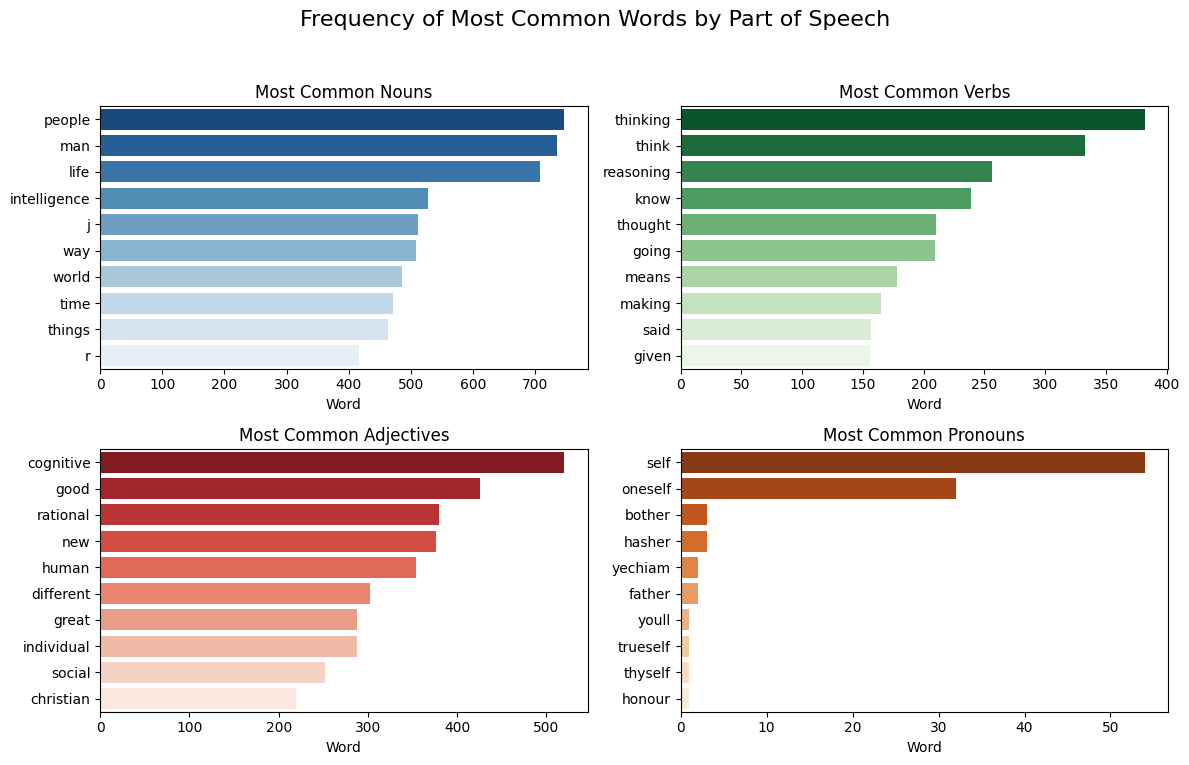

In [60]:
# Count occurrences of each PoS
import matplotlib.pyplot as plt
import seaborn as sns

# We first filter based on PoS, then count the occurrences and keep the top 10
noun_counts = pos_df.loc[pos_df['PoS'].str.startswith('N'), 'Word'].value_counts().head(10) 
verb_counts = pos_df.loc[pos_df['PoS'].str.startswith('V'), 'Word'].value_counts().head(10)
adj_counts = pos_df.loc[pos_df['PoS'].str.startswith('JJ'), 'Word'].value_counts().head(10)
pronoun_counts = pos_df.loc[pos_df['PoS'].str.startswith('PR'), 'Word'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Our figure will be comprised of 2 x 2 subplots
sns.barplot(x=noun_counts, y=noun_counts.index, ax=axes[0, 0], palette='Blues_r') 
# The x axis will depict the count, the y axis will depict the noun (which is the df index), the palette specifies a blue gradient
sns.barplot(x=verb_counts, y=verb_counts.index, ax=axes[0, 1], palette='Greens_r')
sns.barplot(x=adj_counts, y=adj_counts.index, ax=axes[1, 0], palette='Reds_r')
sns.barplot(x=pronoun_counts, y=pronoun_counts.index, ax=axes[1, 1], palette='Oranges_r')

# Set plot titles
axes[0, 0].set_title('Most Common Nouns')
axes[0, 1].set_title('Most Common Verbs')
axes[1, 0].set_title('Most Common Adjectives')
axes[1, 1].set_title('Most Common Pronouns')

# Set y-axis labels to be more readable
for ax in axes.flat:
    ax.set_ylabel('')

# Set overall plot title and adjust spacing
plt.suptitle('Frequency of Most Common Words by Part of Speech', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [61]:
pos_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word,PoS
0,lyrical,JJ
1,stay,NN
2,closed,VBD
3,inside,RB
4,chase,JJ
...,...,...
174730,5455,CD
174731,worst,JJS
174732,performance,NN
174733,rule,NN



> Now, let's visualize our most common words corresponding to PoS nouns, adjectives, verbs and pronouns as wordclouds.




In [62]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


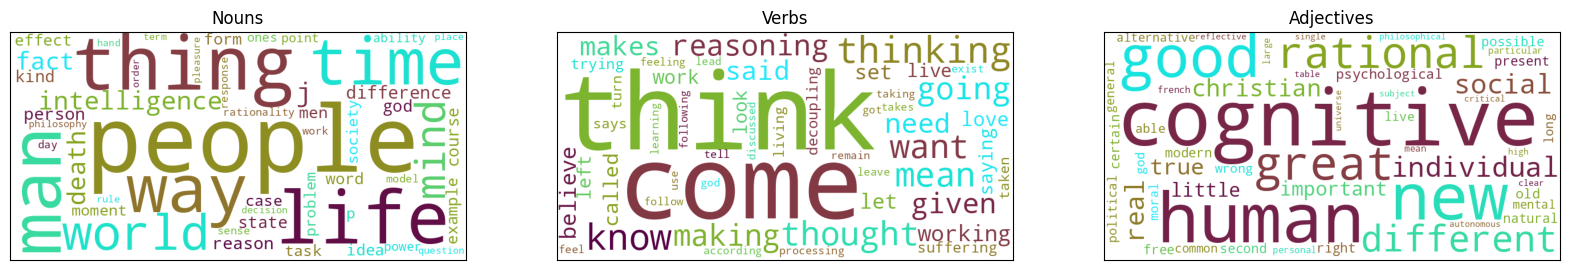

In [63]:
from wordcloud import WordCloud, STOPWORDS

noun_counts = " ".join(list(pos_df.loc[pos_df['PoS'].str.startswith('N'), 'Word']))
verb_counts = " ".join(list(pos_df.loc[pos_df['PoS'].str.startswith('V'), 'Word']))
adj_counts = " ".join(list(pos_df.loc[pos_df['PoS'].str.startswith('JJ'), 'Word']))
pronoun_counts = " ".join(list(pos_df.loc[pos_df['PoS'].str.startswith('PR'), 'Word']))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, width=800, height=400)

# Generate the word cloud from the text
wordcloud.generate(noun_counts)
wordcloud.to_file('nouns.png')
wordcloud.generate(verb_counts)
wordcloud.to_file('verbs.png')
wordcloud.generate(adj_counts)
wordcloud.to_file('adj.png')
wordcloud.generate(pronoun_counts)
wordcloud.to_file('pronoun.png')


# Now display each wordcloud in an image array.
import cv2
img1 = cv2.imread("nouns.png")
img2 = cv2.imread("verbs.png")
img3 = cv2.imread("adj.png")
img4 = cv2.imread("pronoun.png")

titles = ['Nouns', 'Verbs','Adjectives', 'Pronouns']
images = [img1, img2, img3, img4]

plt.figure(figsize=(20,20))

for i in range(3):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

##**Generator**

One more interesting aspect that worths trying is computing the similarity bewtween one's phylosophical discourse and all the books already analysed. Let's choose the J.B. Peterson's *12 Rules for Life* bestseller in order to *try* tp catch the undelying phylosophy beneath his idea. 

In [64]:
# J.B. Peterson's "12 Rules for Life"
file_ = open("/content/drive/MyDrive/DM_project/12-Rules-for-Life.txt", "r", encoding = "ISO-8859-1")
jbp = file_.read()

jbp = clean_chars_raw(jbp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# cos-similarity for the 6 books
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer()
vectorizer = TfidfVectorizer()

columns = ['Nihilist','Stoic', 'Marxist', 'Christian', 'Hedonist', 'Rational', 'JBP']
corpus = [nihil_book, stoic_book, marx_book, christian_book, hedonism_book, rational_book, jbp]

X = count_vect.fit_transform(corpus)

pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names_out(),index=columns)

trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=columns)


from sklearn.metrics.pairwise import cosine_similarity

arr_jbp = cosine_similarity(trsfm[0:len(columns)], trsfm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
arr_jbp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.40953398, 0.11449986, 0.36974648, 0.35660506,
        0.07718868, 0.0239794 ],
       [0.40953398, 1.        , 0.18397655, 0.59891603, 0.42376517,
        0.13339609, 0.03365168],
       [0.11449986, 0.18397655, 1.        , 0.14931269, 0.22588143,
        0.06480107, 0.01266897],
       [0.36974648, 0.59891603, 0.14931269, 1.        , 0.40694549,
        0.12517519, 0.03592546],
       [0.35660506, 0.42376517, 0.22588143, 0.40694549, 1.        ,
        0.15428082, 0.02827349],
       [0.07718868, 0.13339609, 0.06480107, 0.12517519, 0.15428082,
        1.        , 0.01326146],
       [0.0239794 , 0.03365168, 0.01266897, 0.03592546, 0.02827349,
        0.01326146, 1.        ]])

We found that the closest (as distance similarity) two books are the **Christian**, **Stoic** and **Rational** ones. Let's feed the model with 100% and 75% of these books, respectively. 

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, SimpleRNN
from keras.layers import CuDNNGRU, GRU
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import argparse


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now, take from each books the specified percentage.  

In [69]:
def extract_percentage(text, percentage):
    # Calculate the number of characters to extract
    num_chars = int(len(text) * (percentage / 100))

    # Extract the desired percentage of text
    extracted_text = text[:num_chars]

    return extracted_text

christian_jbp = extract_percentage(christian_raw, 100)
stoic_jbp = extract_percentage(stoic_raw, 75)
corpus_jbp = christian_jbp + " " + stoic_jbp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
len(corpus_jbp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


675909

In [71]:
text = corpus_jbp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# text = open('/content/drive/MyDrive/DM_project/A_Communist_Manifesto.txt', 'r',encoding = "ISO-8859-1").read()
text = text.replace('\r', ' ')
text = text.replace('\n', ' ')
text = text.replace('!', '@')
text = text.replace('?', '@')
text = text.replace(';', '@')
text = text.replace('.', '@')

text = ''.join(c for c in text if c in allowed_chars or c =='@')
import re
sentences = [x for x in re.split("[//@]", text) if x!=""]
#res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
import pandas as pd
import numpy as np
import string, os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# set seeds for reproducability
import tensorflow
tensorflow.random.set_seed(2)
from numpy.random import seed
seed(1)

In [75]:
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku

In [76]:
def clean_text(txt):
    txt = "".join(t for t in txt if t not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

corpus = [clean_text(x) for x in sentences]
print(corpus[:10])



['i am now inclined to think that this was a mistakean undesirable hybrid between the art of speaking and the art of writing', ' a talker ought to use variations of voice for emphasis because his medium naturally lends itself to that method but a writer ought not to use italics for the same purpose', ' he has his own different means of bringing out the key words and ought to use them', ' in this edition i have expanded the contractions and replaced most of the italics by recasting the sentences in which they occurred but without altering i hope the popular or familiar tone which i had all along intended', ' i have also added and deleted where i thought i understood any part of my subject better now than ten years ago or where i knew that the original version had been misunderstood by others', ' the reader should be warned that i offer no help to anyone who is hesitating between two christian denominations', ' you will not learn from me whether you ought to become an anglican a methodis

In [77]:
tokenizer = Tokenizer()
def get_sequence_of_tokens(corpus):
    # tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    # convert data to a token sequence 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        print(token_list)

        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
print(inp_sequences[:10])

Streaming output truncated to the last 5000 lines.
[18, 99, 119, 67, 1, 631, 3, 1, 685, 826, 313, 47, 371, 18, 258, 2, 1138, 9, 5, 146, 95, 17, 34, 1, 57, 35, 42, 99, 5950, 2, 1336, 6, 221, 1, 57, 35, 42, 298, 2, 1, 416, 26, 1336, 5951, 57, 796, 5952]
[73, 102, 85]
[1, 764, 86, 18, 352, 38, 4, 730, 980, 2, 1422, 1, 97, 567, 6, 8, 18, 1997]
[23, 36, 34, 66, 191, 8, 45, 80, 251, 47, 4, 175, 3, 2385, 5, 8, 18, 170, 131, 64, 1497, 32, 2386, 44, 8, 41, 2, 14, 3891, 67]
[23, 36, 34, 66, 191, 3, 4, 175, 3, 5953, 191, 8, 18, 103, 2949, 56, 361, 3, 1, 3775, 5, 450, 158, 45, 7, 56, 5954, 43, 8, 9, 34, 78, 2, 50, 7, 336, 963, 2, 2949, 31, 5955, 41, 2, 14, 3891, 67]
[12, 84, 117, 21, 42, 41, 69, 1596, 482, 7, 45, 371, 17, 507, 4, 97, 41, 1, 191, 3, 60, 2385, 19, 3, 4, 3704, 7, 31, 159]
[1, 107, 387, 3, 145, 167, 6, 2, 1215, 8, 191, 68, 974]
[40, 27, 119, 9, 5956, 68, 974, 69, 49, 84, 24, 181, 8, 167, 6, 4, 1328, 5, 128, 78]
[27, 412, 2, 276, 8, 45, 6, 73, 5957]
[7, 116, 3, 129, 17, 298, 25, 48, 24

In [78]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)


In [79]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    # ----------Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    # ----------Add Hidden Layer 1
    model.add(GRU(100))
    model.add(Dropout(0.1))
    # ----------Add Output Layer
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 109, 10)           96130     
                                                                 
 gru (GRU)                   (None, 100)               33600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 9613)              970913    
                                                                 
Total params: 1,100,643
Trainable params: 1,100,643
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(predictors, label, epochs=10, verbose=5)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [82]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictx = model.predict(token_list, verbose=0) 
        predicted = np.argmax(predictx,axis=1)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [83]:
print(generate_text("I", 30, model, max_sequence_len))


I Am Not Going To Find The Right Man As You Are Not A Good Deal Of The Same Way As You Are Not A Great Deal Of The Same Man


In [84]:
print(generate_text("Life", 30, model, max_sequence_len))


Life Is Not A Good Thing In The Same Way As A Man Is A Better Than A Man Or A Man Or A Better Or Worse Than A Man Is


In [85]:
print(generate_text("Human", 30, model, max_sequence_len))


Human Beings Have Been A Different Deal Of The Same Way As A Man Is A Better Than A Man Or A Man Or A Better Or Worse Than A Man


In [86]:
print(generate_text("Well", 30, model, max_sequence_len))


Well Is A Great Many Of Us And That They Have Been A Trained And A Stream For The Other Time And Not Only The Same Man As We Are Not


In [87]:
print(generate_text("Truth", 30, model, max_sequence_len))


Truth Is The Most Thing Thing To Be A Good Man And Not The Same Man As He Is Not A Great Man And He Is Not A Great Deal Than


## **10. Conclusion**

Some conclusions may be drawn from the analysis models performance:

>
> ### **Overall**
* Choosing a certain book can have an influence on the results overall, but it is not highly impactful.
>





>
> ### **TF-IDF**
1. The highest TF-IDF scoring words for each book are indeed representative for a certain philosophy.
2. **As for the books chosen**, we can draw some conclusion after using the document similarity metrics:
  * If 2 books have a low similarity distance, it does not necessarilty mean that they *agree* overall, but rather target similar subjects, morover if one book specifically expresses reluctance for another.
>

> ### **N-grams**
* We can draw insightful conclusions about on a philosophy by looking at the most common (based on TF-IDF) n-grams. Also, by comparing each others' n-grams using their common word(s) (here, bigrams were only feasible/helpful) we can observe how each philosophy treats same ideas at expression level. 
>

> ### **Topic analysis**
* Here, the model is performing relatively well on distributing the topics. However, it collapses two topics to one, e.g. Stoicism & Christianity or Marxism with Hedonism. This confusion of the model can be related to the fact that Stoic books is closest to Christian and Marxist book to the Hedonist one.
>

> ### **Sentiment analysis**
* Given 7 categories of emotions, the pre-trained model RoBERTa from Hugging Face gives nearly expected results when classifying emotions. 
* The distilled version of RoBERTa model is faster than the large version, yet it gives decent output on the generation part.

> ### **Generator**
* The model eventually generates unuseful stowords given that they are very common but they should not be removed because they are needed for the natural fluency of the grammar.
> 